# Sprint 5

# Tasta M5 T01

## Ejercicio 1

### Descarga el dataset adjunto de datos oficiales de la UEFA y selecciona un atributo del conjunto de datos. 

Primero se importan todas las librerías.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

Despues descargamos el dataset `Lligues Europees UEAFA`

In [2]:
df = pd.read_csv('Lligues europees UEFA.csv', encoding="latin-1", sep=';')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

df.head(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.10,26.80,59.30,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.60,33.10,51.40,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.00,45.80,27.20,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.10,37.10,51.00,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.60,38.10,33.40,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


#### Exploración 

Exploramos el dataset para saber que es lo que contiene.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

El dataset está compuesto por 98 registros, 21 columnas y no hay valores faltantes en ninguna de ellas. Sus dtypes son interger, float y object.

A continuación presentamos el significado de cada columna:

1. **Rk**: Clasificación
2. **Squad**: Nombre del equipo 
3. **Country**: País 
4. **LgRk**: Número de clasificación en la liga
5. **MP**: Partidos jugados
6. **W**: Número de victorias 
7. **D**: Empates 
8. **L**: Derrotas 
9. **GF**: Goles a favor 
10. **GA**: Goles en contra 
11. **GD**: Diferencia de goles 
12. **Pts**: Puntos 
13. **Pts/G**: Puntos por partido 
14. **xG**: Goles esperados
15. **xGA**: Goles esperados permitidos
16. **xGD**: Diferencia de goles esperados
17. **xGD/90**: Diferencia de goles esperada por 90 minutos (partido jugado)
18. **Last 5**: Últimos 5 resultados
19. **Attendance**: Asistencia 
20. **Top Team Scorer**: Máximo goleador del equipo
21. **Goalkeeper**: Portero del equipo

Transformamos las columnas que son *dtypes* intergers a floats para poder aplicar futuros tests.

In [4]:
df[['LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']] = df[['LgRk', 'MP', 'W', 'D', 
                                                                 'L', 'GF', 'GA', 'GD', 'Pts']].astype(float)

In [5]:
df.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00
mean,49.50,10.32,36.31,13.45,9.41,13.45,50.88,50.88,0.00,49.73,1.37,48.65,48.65,-0.01,0.00,24239.86
std,28.43,5.71,1.15,5.75,2.90,5.12,16.10,13.63,26.50,16.17,0.44,12.45,9.81,19.99,0.55,14874.17
min,1.00,1.00,34.00,3.00,3.00,2.00,23.00,24.00,-56.00,18.00,0.53,28.20,26.80,-40.40,-1.09,5870.00
25%,25.25,5.25,36.00,9.00,7.00,10.00,39.00,40.00,-17.75,37.00,1.00,39.10,41.30,-13.58,-0.36,12355.50
50%,49.50,10.00,37.00,13.00,9.00,13.00,47.00,50.00,-1.00,46.00,1.30,46.45,47.75,-1.10,-0.03,20491.00
75%,73.75,15.00,37.00,17.00,11.00,17.00,60.00,59.00,17.25,61.75,1.69,55.55,54.70,12.80,0.35,32382.00
max,98.00,20.00,37.00,28.00,16.00,26.00,97.00,89.00,72.00,90.00,2.43,88.10,73.30,59.30,1.60,73150.00


In [6]:
df.describe(include='O').T

,count,unique,top,freq
Squad,98,98,Manchester City,1
Country,98,5,ENG,20
Last 5,98,80,W W W L L,4
Top Team Scorer,98,98,Kevin De Bruyne - 15,1
Goalkeeper,98,98,Ederson,1


Al hacer los resumenes estadísticos, podemos observar que algunas columnas muestran valores negativos, como la diferencia de goles esperada y la diferencia de goles esperada por partido.  Esto se debe a que algunos equipos pueden tener un desempeño defensivo más débil o enfrentarse a oponentes más fuertes, lo que resulta en una diferencia de goles negativa. 

También observamos que la columna de _Top Team Scorer_ contiene además del número de jugador, también el número de goles, por lo que procedemos a crear una nueva columna que se llame **Goals Scored**.

In [7]:
df[['Top Team Player', 'Goals Scored']] = df['Top Team Scorer'].str.split(' - ', n=1, expand=True)
df = df.drop(columns='Top Team Scorer')
df.head(3)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Top Team Player,Goals Scored
0,1,Manchester City,ENG,1.00,37.00,28.00,6.00,3.00,96.00,24.00,72.00,90.00,2.43,86.10,26.80,59.30,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
1,2,Liverpool,ENG,2.00,36.00,26.00,8.00,2.00,89.00,24.00,65.00,86.00,2.39,84.60,33.10,51.40,1.43,W W W D W,53367,Alisson,Mohamed Salah,22
2,3,Real Madrid,ESP,1.00,37.00,26.00,7.00,4.00,80.00,31.00,49.00,85.00,2.30,73.00,45.80,27.20,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27


In [8]:
df['Squad'].unique()

array(['Manchester City', 'Liverpool', 'Real Madrid', 'Bayern Munich',
       'Paris S-G', 'Milan', 'Inter', 'Napoli', 'Dortmund', 'Barcelona',
       'Chelsea', 'Juventus', 'Leverkusen', 'Monaco', 'Tottenham',
       'Marseille', 'Atlético Madrid', 'Arsenal', 'Sevilla', 'Rennes',
       'Betis', 'Lazio', 'RB Leipzig', 'Strasbourg', 'Nice',
       'Union Berlin', 'Real Sociedad', 'Lens', 'Fiorentina', 'Roma',
       'Freiburg', 'Atalanta', 'Lyon', 'Manchester Utd', 'Köln',
       'Villarreal', 'West Ham', 'Athletic Club', 'Nantes', 'Lille',
       'Hellas Verona', 'Wolves', 'Torino', 'Mainz 05', 'Sassuolo',
       'Hoffenheim', 'Leicester City', "M'Gladbach", 'Brighton', 'Brest',
       'Osasuna', 'Crystal Palace', 'Celta Vigo', 'Reims',
       'Eint Frankfurt', 'Brentford', 'Wolfsburg', 'Bochum',
       'Aston Villa', 'Valencia', 'Udinese', 'Newcastle Utd',
       'Montpellier', 'Bologna', 'Rayo Vallecano', 'Augsburg', 'Espanyol',
       'Southampton', 'Getafe', 'Elche', 'Angers', 'Em

In [9]:
df['Country'].unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

In [10]:
df['Goalkeeper'].nunique()

98

In [11]:
df['Top Team Player'].nunique()

98

In [12]:
pd.DataFrame(df.groupby('Country')['Squad','Top Team Player', 'Goalkeeper'].nunique().reset_index())

,Country,Squad,Top Team Player,Goalkeeper
0,ENG,20,20,20
1,ESP,20,20,20
2,FRA,20,20,20
3,GER,18,18,18
4,ITA,20,20,20


In [13]:
df.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Goalkeeper         0
Top Team Player    0
Goals Scored       0
dtype: int64

Finalmente exploramos las columnas nominales para saber los nombres de los equipos y paises, así como el número de goleadores y porteros, además de agruparlos por  país. Después confirmamos que no hay valores vacíos.

#### Visualización

Creamos algunas gráficas para poder visualizar la información que acabamos de explorar.

Primero vemos que países tienen más partidos ganados.

<Axes: xlabel='Country', ylabel='W'>

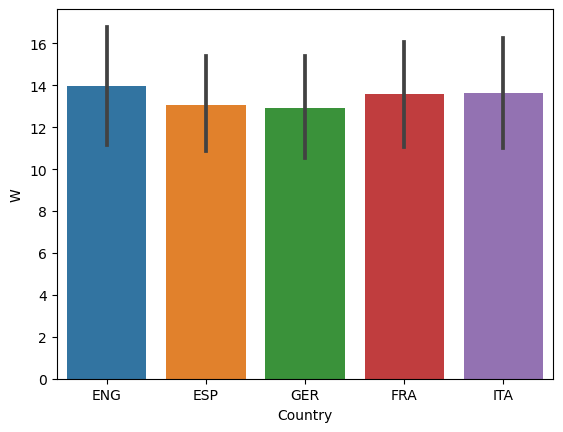

In [14]:
sns.barplot(x='Country', y='W', data=df)

Usamos un boxplot para visualizar la media y los percentiles de cada país y saber si hay algún outlier.

<Axes: title={'center': 'Pts'}, xlabel='Country'>

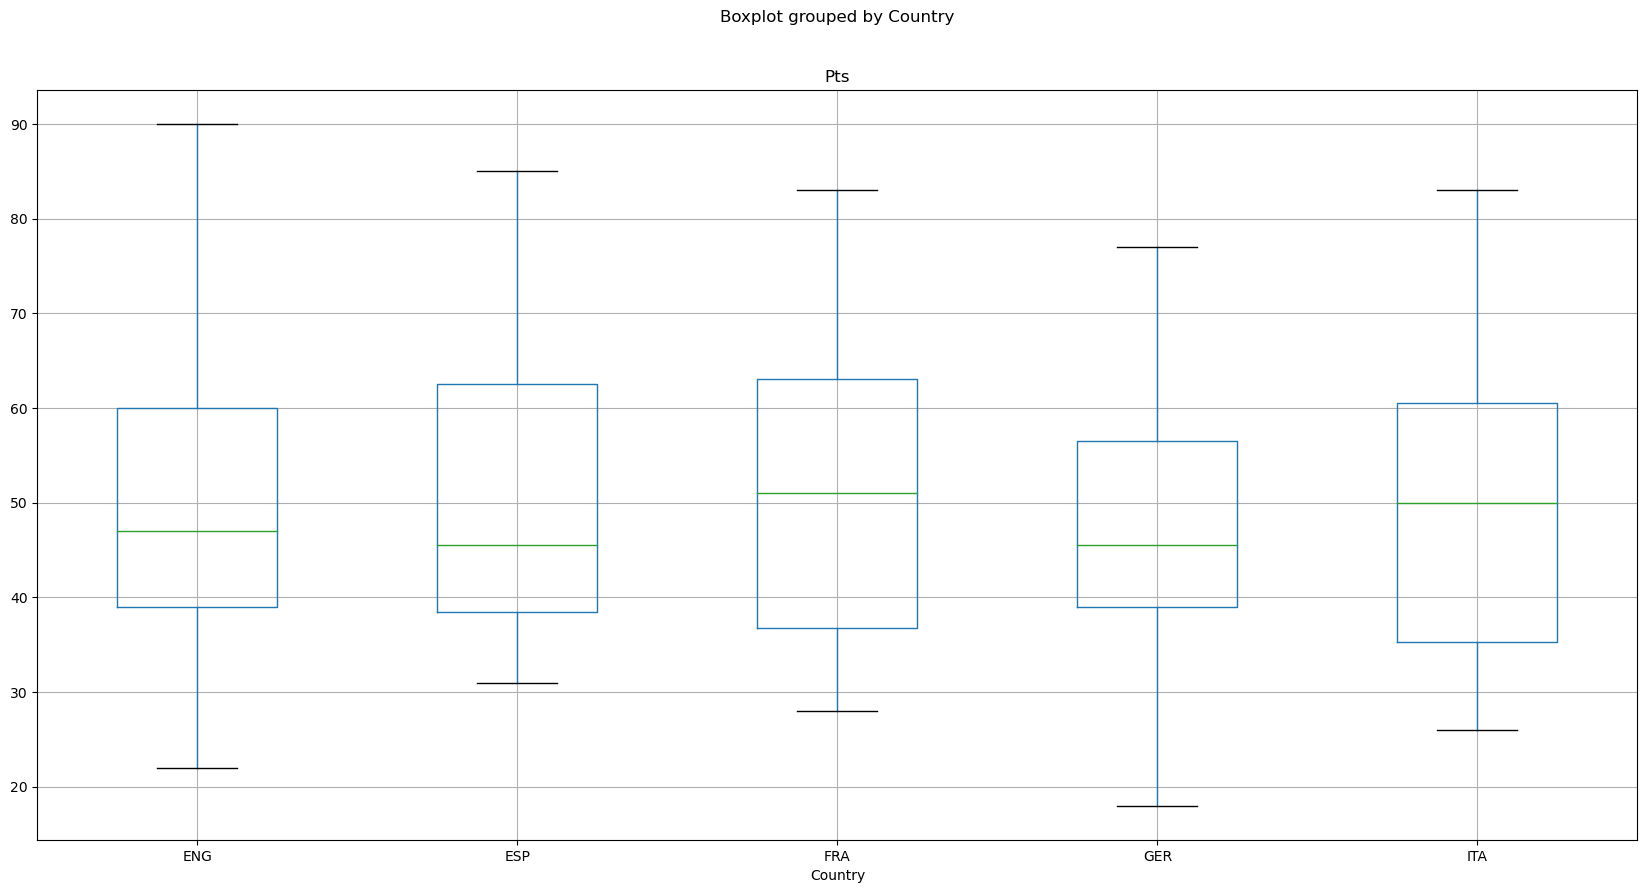

In [15]:
df.boxplot(column='Pts', by='Country', figsize=(20,10))

Usamos un mapa de calor para poder visualizar de manera más efectiva la correlación que existe entre las columnas.

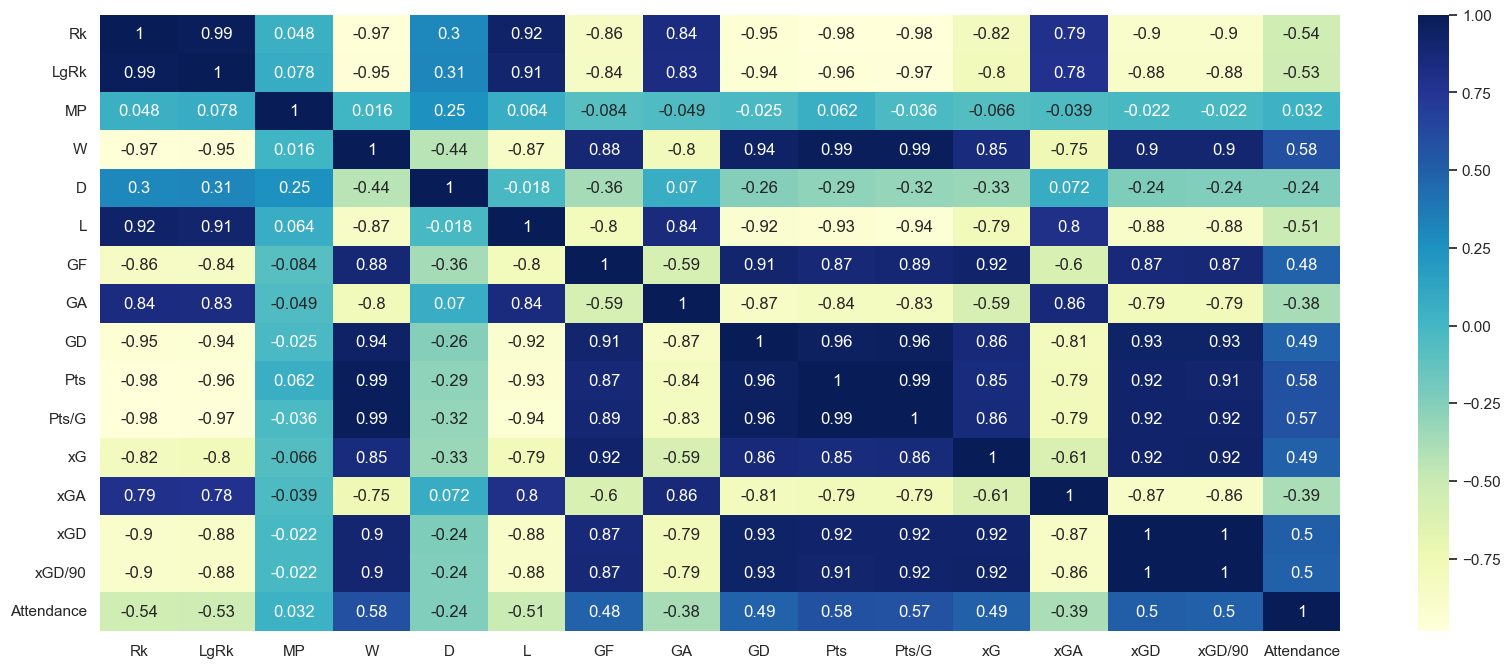

In [16]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

### Calcula el p-valor y determina si rechazas la hipótesis nula tomando un alfa del 5%.

Realizaremos un test de normalidad utilizando la prueba de Shapiro-Wilk y así determinar si los datos en la columna `'W': Número de Victorias` siguen una distribución normal.

Las hipótesis son las siguientes: 

*  **Hipótesis Nula (h0)**: Los datos siguen una distribución normal.
*  **Hipótesis Alternativa (h1)**: Los datos no siguen una distribución normal.

In [17]:
stat, p = shapiro(df['W'])
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Los datos siguen una distribución normal. Por lo tanto, no se rechaza la Hipótesis Nula (H0).')
else: 
    print('Los datos no siguen una distribución normal. Por lo tanto, se rechaza la Hipótesis Nula (H0).')

stat=0.965, p=0.011
Los datos no siguen una distribución normal. Por lo tanto, se rechaza la Hipótesis Nula (H0).


**El p-valor es de 0.011, lo cual es menor al nivel de significancia del 5% establecido como alpha. Esto significa que tenemos la confianza suficiente para rechazar la hipótesis nula.**

A continuación usamos un gráfico de Densidad y otro de QQQ para confirmar que no hay una distribución normal con los valores de la columna 'W'.

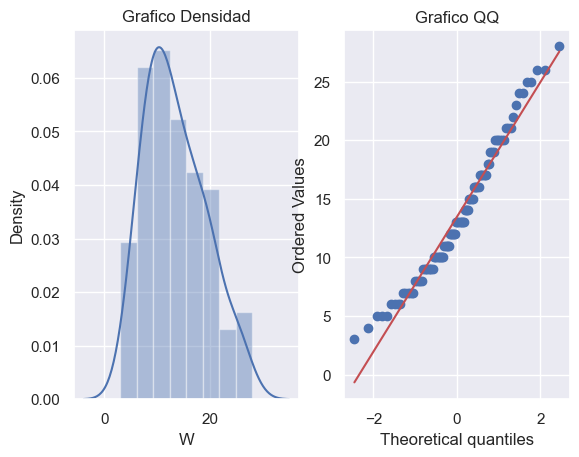

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2)

sns.distplot(df['W'], ax=axs[0]);
axs[0].set_title('Grafico Densidad');

stats.probplot(df['W'].values, dist='norm', plot=plt)
axs[1].set_title('Grafico QQ')

plt.show()

## Ejercicio 2

### Usando el mismo dataset, selecciona otros dos atributos del conjunto de datos.  Calcula el p-valor y determina si rechazas la hipótesis nula tomando un alfa del 5%.

Para este ejercicio, nos gustaría saber si existe una asociación o vínculo entre la asistencia a los partidos y el número de derrotas de los equipos españoles en la UEFA.

Por lo que establecemos las hipótesis de la siguiente manera:

* **Hipótesis Nula (h0)**: Existe relación entre la asistencia de espectadores y las derrotas de los equipos en los partidos de la UEFA. 
* **Hipótesis Alternativa (h1)**: No existe relación entre la asistencia de espectadores y las derrotas de los equipos en los partidos de la UEFA. 

In [19]:
publico = df['Attendance'].values
derrotas = df['L'].values

stat, p = pearsonr(publico, derrotas)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Existe una relación entre la asistencia y las derrotas. Por lo tanto, se no se rechaza la Hipótesis Nula (H0).')
else: 
    print('No existe una relación entre la asistencia y las derrotas. Por lo tanto, se rechaza la Hipótesis Nula (H0).')

stat=-0.510, p=0.000
No existe una relación entre la asistencia y las derrotas. Por lo tanto, se rechaza la Hipótesis Nula (H0).


**El valor p obtenido es 0.00, lo cual nos proporciona evidencia sólida para afirmar con total confianza que no existe relación entre la asistencia de los espectadores y las derrotas de los equipos en los partidos de la UEFA. Por lo tanto, podemos con seguridad rechazar la Hipótesis Nula.**

A continuación usamos una gráfica de regresión lineal para confirmar visualmente la falta de relación entre las columnas de 'Attendance' y  'L' de los equipos de la UEFA.

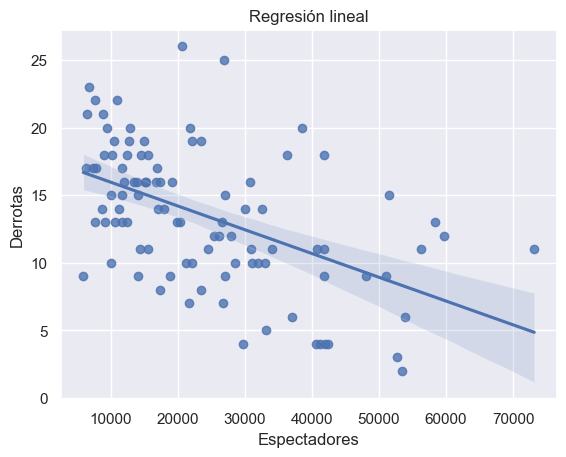

In [20]:
sns.regplot(x='Attendance', y='L', data=df)
plt.xlabel('Espectadores')
plt.ylabel('Derrotas')
plt.title('Regresión lineal')
plt.show()

## Ejercicio 3

### Continúa con el conjunto de datos adjunto y selecciona tres atributos. Calcula el valor de p y determina si se rechaza la hipótesis nula tomando un nivel de significancia del 5%. 

Para este ejercicio, nos gustaría saber si hay diferencias entre las medias de las derrotas, goles en contra y diferencia de goles esperadas usando el test de anova.

Por lo que establecemos las hipótesis de la siguiente manera:

* **Hipótesis Nula (h0)**: Las medias los tres grupos son iguales.
* **Hipótesis Alternativa (h1)**: Al menos una de las medias es diferente a las demás. 

In [28]:
data = df['L']
data_1 = df['GA']
data_2 = df['GD']

stat, p = f_oneway(data, data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Las medias de los tres grupos son iguales. Por lo tanto, no se rechaza la Hipótesis Nula (H0).')
else: 
    print('Al menos una de las medias es diferente a las demás. Por lo tanto, se rechaza la Hipótesis Nula (H0).')

stat=223.449, p=0.000
Al menos una de las medias es diferente a las demás. Por lo tanto, se rechaza la Hipótesis Nula (H0).


**El valor p obtenido es 0.00, lo cual nos proporciona evidencia sólida para afirmar que al menos una de las medias entre el número de derrotas, los goles en contra y la diferencia de goles es significativamente diferente de las demás. Por lo tanto, podemos con confianza rechazar la Hipótesis Nula.**

A continuación, utilizamos una gráfica de densidad que confirma visualmente que las medias son diferentes entre sí.

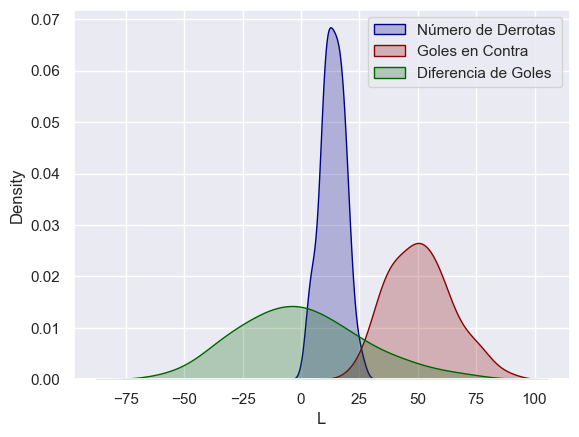

In [29]:
sns.kdeplot(df['L'], label= 'Número de Derrotas', color= 'darkblue', fill = True)
sns.kdeplot(df['GA'], label= 'Goles en Contra', color= 'darkred', fill = True)
sns.kdeplot(df['GD'], label= 'Diferencia de Goles', color= 'darkgreen', fill = True)
plt.legend()
plt.show()

# FIN